<img src="http://vision.skills.network/logo-light.png" width="400" alt="CV Studio logo"  />


Estimated time needed: **60** minutes


You will learn how to train a K-Nearest Neighbours (k-NN), a supervised Machine Learning algorithm to classify your images. KNN learns from a labeled training set by taking in the training data along with its labels and learns to map the input to its desired output.


* * *


## Load Important Libraries


Libraries for data processing and visualization:


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime

Libraries for image pre-processing and classification:


In [2]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Libraries for OS and Cloud:


In [3]:
import os
from skillsnetwork import cvstudio

## Download Your Images and Annotations


Now, let's initialize and download the images from the project you just created in CV Studio.


In [4]:
# Initialize the CV Studio Client
cvstudioClient = cvstudio.CVStudio()

# Download All Images
cvstudioClient.downloadAll()

100%|██████████| 1845/1845 [05:06<00:00,  6.03it/s]


👈🏾 You can check the side panel to see if your images downloaded.


Get the annotations from the project you downloaded from CV Studio:


In [5]:
annotations = cvstudioClient.get_annotations()

Let's view the format of the annotations we've just downloaded. The following code will display only the first 5 annotations. The annotations will come in a JSON file. What you can see is the image name as the key and `dog` as label object.


In [6]:
first_five = {k: annotations["annotations"][k] for k in list(annotations["annotations"])[:5]}
first_five

{'2f919fa8-7b0f-44d5-8684-ddb6b7ffb957.jpg': [{'label': 'nor',
   'id': '5db4eeb0-c7b4-482f-b6db-e625fc1f1a57'}],
 '31507971-f27c-45c8-8d64-b6f2c725731f.jpg': [{'label': 'nor',
   'id': '952807a0-5b42-4741-a51a-a234e223102e'}],
 '32a7a263-f1c8-4a1c-8165-36bd6461d6b3.jpg': [{'label': 'nor',
   'id': 'cf5f1751-d15f-4414-855a-7445d9d2f5a4'}],
 '354e6e0e-9634-4b01-95a2-55d123756716.jpg': [{'label': 'nor',
   'id': '56999331-1f71-4597-8c11-afbc1b51207d'}],
 '37644329-75b3-4baf-880a-4d458f3e3124.jpg': [{'label': 'nor',
   'id': '27d8b8c8-64a5-4720-8ef4-4fbd0ade86a3'}]}

# Load and Plot and Image

We will train and classify your images using the k-NN classifier using the <code>OpenCV</code> library. Before we start, let's get the images and take a look at some of them.


We will pick random images and take a look:


In [7]:
random_filename = 'images/' + random.choice(list(annotations["annotations"].keys()))

Plot, read and show a random image using the `cv2.imread` and the `matplotlib` library.

We will also change the color space to `RGB` so we can plot it since `OpenCV` reads images as `BGR`. Early developers at `OpenCV` chose `BGR` color format because it was the format that was popular among camera manufacturers and software providers.


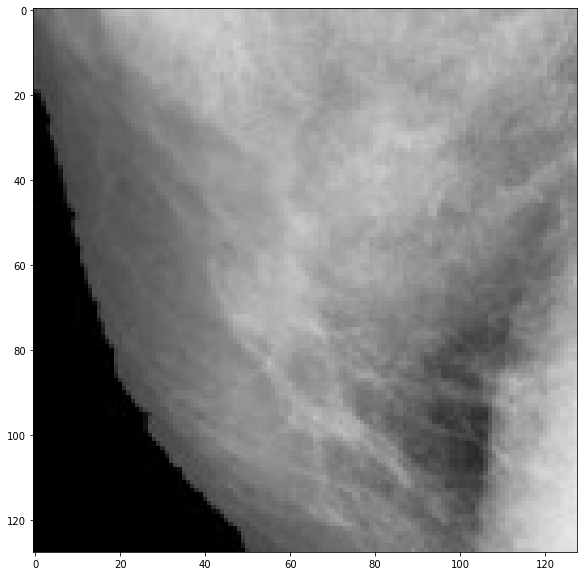

In [8]:
sample_image = cv2.imread(random_filename)
## Convert to RGB
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
## Now plot the image
plt.figure(figsize=(10,10))
plt.imshow(image, cmap = "gray")
plt.show()

In [9]:
## if you plot with sample_image, you will observe a difference in the color space
## uncomment to try it out
# plt.imshow(sample_image)
# plt.show()

To perform KNN on the dataset, we will need to process the data. I will use the sample image to explain each line of code.


Convert image to grayscale - grayscale simplifies the algorithm and reduces computational requirements.


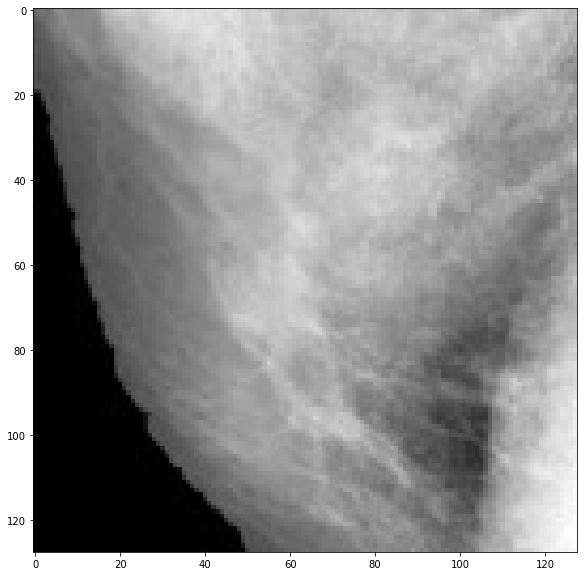

In [10]:
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(sample_image, cmap = "gray")
plt.show()

Resize image - resizing image helps the algorithm train faster.


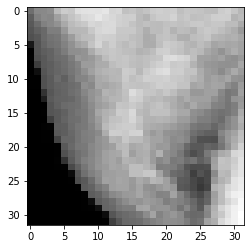

In [11]:
sample_image = cv2.resize(sample_image, (32, 32))
plt.imshow(sample_image, cmap = "gray")
plt.show()

Flatten image - makes the image a numpy array for the algorithm to handle and recognize.


In [12]:
pixels = sample_image.flatten()
pixels

array([ 99, 121, 122, ..., 206, 214, 225], dtype=uint8)

## Repeat the Process Above for All Images


We will now repeat the same process above to load and process all the images you’ve annotated and label each picture. KNN is supervised machine learning algorithm, therefore we have to explicitly create labels for the machine.

Depending on how much data you have, this will take a while to run...


In [13]:
image_paths = list(paths.list_images('images'))
train_images = []
train_labels = []
class_object = annotations['labels']

# loop over the input images
for (i, image_path) in enumerate(image_paths):
    #read image
    image = cv2.imread(image_path)
    #make images gray
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #label image using the annotations
    label = class_object.index(annotations["annotations"][image_path[7:]][0]['label'])
    tmp_label = annotations["annotations"][image_path[7:]][0]['label']
    # resize image
    image = cv2.resize(image, (32, 32))
    # flatten the image
    pixels = image.flatten()
    #Append flattened image to
    train_images.append(pixels)
    train_labels.append(label)
    print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)

Loaded... 💃 Image 1 is a ben
Loaded... 💃 Image 2 is a ben
Loaded... 💃 Image 3 is a nor
Loaded... 💃 Image 4 is a nor
Loaded... 💃 Image 5 is a ben
Loaded... 💃 Image 6 is a ben
Loaded... 💃 Image 7 is a nor
Loaded... 💃 Image 8 is a nor
Loaded... 💃 Image 9 is a nor
Loaded... 💃 Image 10 is a nor
Loaded... 💃 Image 11 is a nor
Loaded... 💃 Image 12 is a ben
Loaded... 💃 Image 13 is a ben
Loaded... 💃 Image 14 is a ben
Loaded... 💃 Image 15 is a nor
Loaded... 💃 Image 16 is a ben
Loaded... 💃 Image 17 is a nor
Loaded... 💃 Image 18 is a nor
Loaded... 💃 Image 19 is a nor
Loaded... 💃 Image 20 is a nor
Loaded... 💃 Image 21 is a ben
Loaded... 💃 Image 22 is a ben
Loaded... 💃 Image 23 is a ben
Loaded... 💃 Image 24 is a ben
Loaded... 💃 Image 25 is a ben
Loaded... 💃 Image 26 is a ben
Loaded... 💃 Image 27 is a ben
Loaded... 💃 Image 28 is a ben
Loaded... 💃 Image 29 is a ben
Loaded... 💃 Image 30 is a can
Loaded... 💃 Image 31 is a ben
Loaded... 💃 Image 32 is a ben
Loaded... 💃 Image 33 is a ben
Loaded... 💃 Image 3

Create an array of the <code>train_images</code> and <code>train_labels</code>. <code>OpenCV</code> only identifies arrays of type <code>float32</code> for the training samples and array of shape <code>(label size, 1)</code> for the training labels. We can do that by specifying <code>astype('float32')</code> on the numpy array of the training samples and convert the training labels to integers and <code>reshape</code> the array to <code>(label size, 1)</code>. When you print the <code>train_labels</code>, the array will look like this <code>[[1], [0], ..., [0]]</code></p>


In [14]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)

In [15]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape((train_labels.size,1))
print(train_labels)

[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]


Split data into training and test set with a test size of your choice:


In [16]:
test_size = 0.2
train_samples, test_samples, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=0)

To train the KNN model, we will use the <code>cv2.ml.KNearest_create()</code> from the <code>OpenCV</code> library. We need to define how many nearest neighbors will be used for classification as a hyper-parameter k. This parameter k can be toggled with/tuned in the training or model validation process. Fit the training and test images and get the accuracy score of the model.

We will try multiple values of <code>k</code> to find the optimal value for the dataset we have. <code>k</code> refers to the number of nearest neighbours to include in the majority of the voting process.

<i>Note:</i> Depending on how large your dataset is, it may take a few seconds to run.


In [17]:
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)

## get different values of K
k_values = [1, 2, 3, 4, 5]
k_result = []
for k in k_values:
    ret,result,neighbours,dist = knn.findNearest(test_samples,k=k)
    k_result.append(result)
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime-start_datetime))

Training Duration: 0:00:01.916852


We will get the accuracy value for each value of <code>k</code> i.e., how many percent of the images were classified correctly? We will create a confusion matrix for a more comprehensive classification model evaluation.


In [18]:
## create an empty list to save accuracy and the cofusion matrix
accuracy_res = []
con_matrix = []
## we will use a loop because we have multiple value of k
for k_res in k_result:
    label_names = [0, 1]
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    con_matrix.append(cmx)
    ## get values for when we predict accurately
    matches = k_res==test_labels
    correct = np.count_nonzero(matches)
    ## calculate accuracy
    accuracy = correct*100.0/result.size
    accuracy_res.append(accuracy)
## stor accuracy for later when we create the graph
res_accuracy = {k_values[i]: accuracy_res[i] for i in range(len(k_values))}
list_res = sorted(res_accuracy.items())

Now let's visualize the confusion matrix:


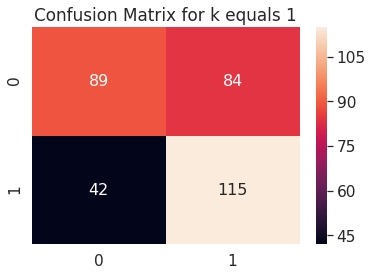

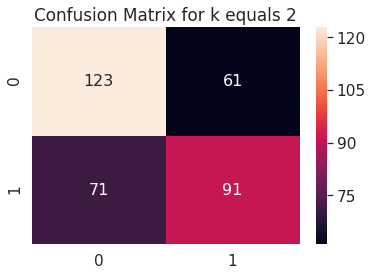

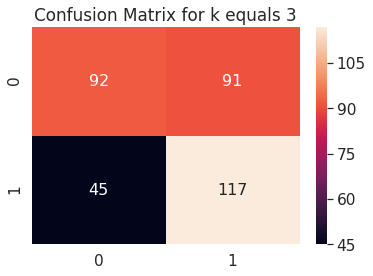

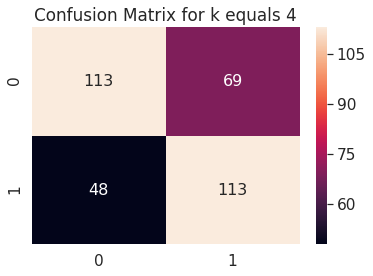

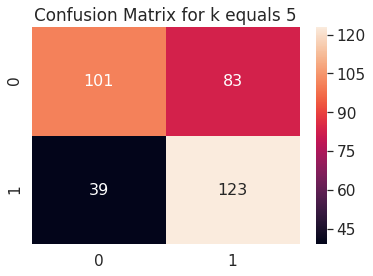

In [19]:
t=0
## for each value of k we will create a confusion matrix
for array in con_matrix:
    df_cm = pd.DataFrame(array)
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt = ".0f") # font size
    t += 1
    title = "Confusion Matrix for k equals " + str(t)
    plt.title(title)
    plt.show()


We will plot the accuracy to see which one is highest i.e., what percentage of images were classified correctly?


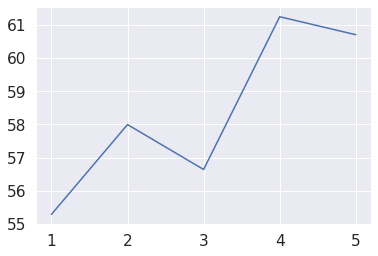

In [20]:
## plot accuracy against 
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()

We will get the best value of <code>k</code> to train the model to test the model on our image:


In [21]:
k_best = max(list_res,key=lambda item:item[1])[0]
k_best

4

## Let's Report Our Results Back to CV Studio


In [22]:
parameters = {
    'k_best': k_best
}
result = cvstudioClient.report(started=start_datetime, completed=end_datetime, parameters=parameters, accuracy=list_res)

if result.ok:
    print('Congratulations your results have been reported back to CV Studio!')

Congratulations your results have been reported back to CV Studio!


Save the KNN model to a file:


In [23]:
knn.save('knn_samples.yml')

👈🏾 Check that the `knn_samples.yml` was saved to your directory.

Now let's save the model back to CV Studio:


In [24]:
result = cvstudioClient.uploadModel('knn_samples.yml', {'k_best': k_best})

File Uploaded
